In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
from prophet import Prophet
from prophet.plot import plot_plotly
%matplotlib inline


In [2]:
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
df['FullDate'] = pd.to_datetime(df['FullDate'])

In [6]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df_copy = df.copy()

In [9]:
df_copy.set_index(df_copy['FullDate'], inplace=True)

In [10]:
avg_yr = df_copy[['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice']].resample('M').mean()

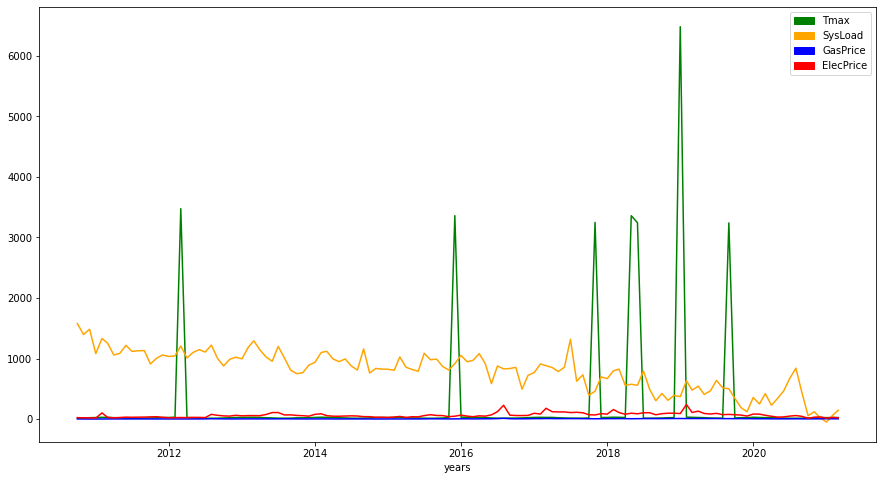

In [19]:
plt.figure(figsize=(15,8))
plt.xlabel('years')
plt.plot(avg_yr.index, avg_yr['Tmax'], color='g')
plt.plot(avg_yr.index, avg_yr['SysLoad'], color='orange')
plt.plot(avg_yr.index, avg_yr['GasPrice'], color='b')
plt.plot(avg_yr.index, avg_yr['ElecPrice'], color='r')

TM = mpatches.Patch(color='g', label='Tmax')
SL = mpatches.Patch(color='orange', label='SysLoad')
GS = mpatches.Patch(color='b', label='GasPrice')
EP = mpatches.Patch(color='r', label='ElecPrice')
plt.legend(handles=[TM, SL, GS, EP]);

In [63]:
avg_yr_EP = df_copy[['ElecPrice']].resample('D').mean()

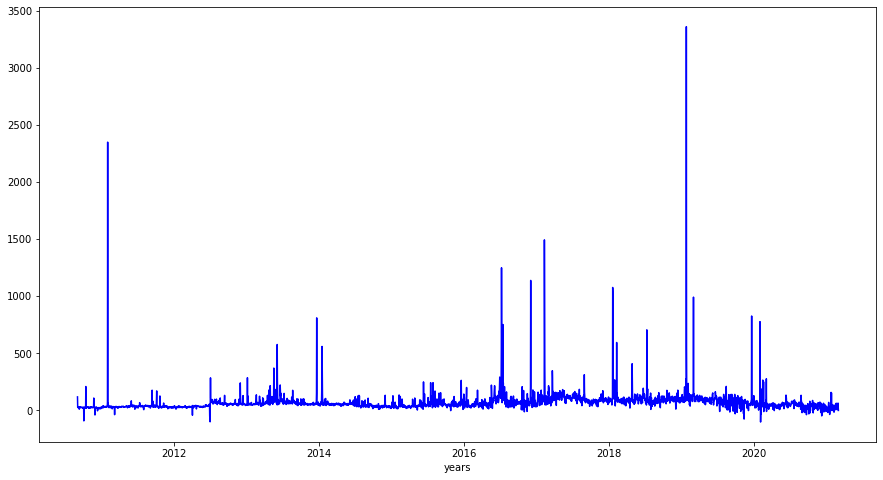

In [65]:
plt.figure(figsize=(15,8))
plt.xlabel('years')

plt.plot(avg_yr_EP.index, avg_yr_EP['ElecPrice'], color='b')

In [68]:
train = df[df_copy.index < pd.to_datetime("2017-07-20", format='%Y-%m-%d')]
test = df[df_copy.index > pd.to_datetime("2017-07-20", format='%Y-%m-%d')]

#The first 2757 days from 2010 to 2021 ends on 2017-07-20

In [69]:
train.drop(['Tmax', 'SysLoad', 'GasPrice'], inplace=True, axis=1)
test.drop(['Tmax', 'SysLoad', 'GasPrice'], inplace=True, axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

In [71]:
train.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [72]:
m = Prophet(interval_width=0.95)
model = m.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnmyrmsdb/fr8dfiqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnmyrmsdb/rfaypaia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28469', 'data', 'file=/tmp/tmpnmyrmsdb/fr8dfiqh.json', 'init=/tmp/tmpnmyrmsdb/rfaypaia.json', 'output', 'file=/tmp/tmpnmyrmsdb/prophet_model0c0ihf15/prophet_model-20230131182705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:27:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:
forcast = m.predict(test)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-20 01:00:00,119.611683,-187.371044,526.624029,119.611683,119.611683,41.022487,41.022487,41.022487,-7.868044,...,11.442302,11.442302,11.442302,37.448229,37.448229,37.448229,0.0,0.0,0.0,160.634171
1,2017-07-20 02:00:00,119.615529,-182.641726,489.107373,119.615529,119.615529,32.845618,32.845618,32.845618,-15.985685,...,11.508645,11.508645,11.508645,37.322657,37.322657,37.322657,0.0,0.0,0.0,152.461146
2,2017-07-20 03:00:00,119.619374,-196.569364,465.184579,119.619374,119.619374,23.286887,23.286887,23.286887,-25.433992,...,11.524076,11.524076,11.524076,37.196803,37.196803,37.196803,0.0,0.0,0.0,142.906261
3,2017-07-20 04:00:00,119.623220,-217.211107,474.248776,119.623220,119.623220,19.165549,19.165549,19.165549,-29.394658,...,11.489538,11.489538,11.489538,37.070670,37.070670,37.070670,0.0,0.0,0.0,138.788769
4,2017-07-20 05:00:00,119.627065,-256.057980,488.076047,119.627065,119.627065,24.025086,24.025086,24.025086,-24.325656,...,11.406481,11.406481,11.406481,36.944262,36.944262,36.944262,0.0,0.0,0.0,143.652152


In [74]:
forcast[['ds', 'yhat']]

,ds,yhat
0,2017-07-20 01:00:00,160.634171
1,2017-07-20 02:00:00,152.461146
2,2017-07-20 03:00:00,142.906261
3,2017-07-20 04:00:00,138.788769
4,2017-07-20 05:00:00,143.652152
...,...,...
31674,2021-02-28 19:00:00,239.796973
31675,2021-02-28 20:00:00,228.333235
31676,2021-02-28 21:00:00,217.394265
31677,2021-02-28 22:00:00,212.613394
